# G-and-k distribution

Notebook for the estimation of the model parameters

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

### Imports

In [ ]:
! pip install qmcpy --quiet

In [ ]:
import numpy as np
import qmcpy

### Optimisation

In [ ]:
np.random.seed(11)

Set parameters:

In [ ]:
m = 2**11                                         # number of true data points
n = 2**9                                          # number of simulated data points
theta_star = np.array([3,1,1,-np.log(2)])         # true theta
d = 1                                             # dimensions of data
p = theta_star.shape[0]                           # dimensions of parameter space
l = -1                                            # lengthscale (l=-1 for median heuristic)
method_gd = 'SGD'                                 # SGD or NSGD
eta = 0.1                                         # step size
max_it = 10000                                    # number of descent steps
start = np.ones(p)*0.5                            # start values

Define QMC sequence:

In [ ]:
qmc = qmcpy.Halton(d+1)

Sample from the g-and-k distribution:

In [ ]:
y,_ = sample_gandk('MC',m,d,theta_star)

Gradient descent:

In [ ]:
theta_mc,loss_mc = optim('gandk','MC',method_gd,eta,max_it,l,n,m,d,p,y,start)

iteration: 1000 
loss:      0.0048863 
estimate:  [ 2.923  0.766  0.553 -0.279] 
gradient:  [-0.031  0.002 -0.003  0.007]
iteration: 2000 
loss:      -0.0001182 
estimate:  [ 3.005  0.996  0.91  -0.679] 
gradient:  [ 0.006 -0.011 -0.001  0.002]
iteration: 3000 
loss:      -3.67e-05 
estimate:  [ 3.01   1.038  0.989 -0.719] 
gradient:  [-0.015  0.02  -0.005  0.009]
iteration: 4000 
loss:      -0.0004584 
estimate:  [ 3.017  1.038  1.007 -0.715] 
gradient:  [ 0.012  0.005 -0.004  0.005]
iteration: 5000 
loss:      -0.0007602 
estimate:  [ 3.026  1.046  1.011 -0.708] 
gradient:  [-0.006  0.006  0.001  0.001]
iteration: 6000 
loss:      -0.0004912 
estimate:  [ 3.018  1.051  1.015 -0.707] 
gradient:  [-0.004  0.017 -0.006  0.013]
iteration: 7000 
loss:      -0.0010397 
estimate:  [ 3.01   1.046  1.014 -0.705] 
gradient:  [ 0.01  -0.004 -0.001  0.001]
iteration: 8000 
loss:      -0.000825 
estimate:  [ 3.015  1.047  1.005 -0.706] 
gradient:  [ 0.009 -0.006  0.004 -0.004]
iteration: 9000 
lo

In [ ]:
theta_qmc,loss_qmc = optim('gandk','QMC',method_gd,eta,max_it,l,n,m,d,p,y,start)

iteration: 1000 
loss:      0.002479 
estimate:  [ 2.925  0.767  0.51  -0.274] 
gradient:  [-0.001 -0.002 -0.005  0.007]
iteration: 2000 
loss:      -0.0012051 
estimate:  [ 3.008  0.997  0.906 -0.693] 
gradient:  [-0.    -0.001 -0.002  0.001]
iteration: 3000 
loss:      -0.0013437 
estimate:  [ 3.024  1.048  0.989 -0.738] 
gradient:  [-4.739e-05 -1.462e-04 -3.363e-04  1.679e-05]
iteration: 4000 
loss:      -0.0013484 
estimate:  [ 3.026  1.053  1.007 -0.733] 
gradient:  [-7.132e-06 -1.291e-05 -9.723e-05 -6.672e-05]
iteration: 5000 
loss:      -0.0013489 
estimate:  [ 3.026  1.054  1.013 -0.728] 
gradient:  [-1.338e-06  1.016e-06 -3.570e-05 -3.797e-05]
iteration: 6000 
loss:      -0.001349 
estimate:  [ 3.026  1.054  1.016 -0.725] 
gradient:  [-3.438e-07  1.257e-06 -1.436e-05 -1.720e-05]
iteration: 7000 
loss:      -0.001349 
estimate:  [ 3.026  1.053  1.017 -0.724] 
gradient:  [-1.155e-07  6.286e-07 -5.930e-06 -7.351e-06]
iteration: 8000 
loss:      -0.001349 
estimate:  [ 3.026  1.05

In [ ]:
theta_rqmc,loss_rqmc = optim('gandk','RQMC',method_gd,eta,max_it,l,n,m,d,p,y,start)

iteration: 1000 
loss:      0.0016469 
estimate:  [ 2.924  0.77   0.548 -0.283] 
gradient:  [-0.002  0.    -0.005  0.007]
iteration: 2000 
loss:      -0.0010357 
estimate:  [ 3.003  0.994  0.916 -0.679] 
gradient:  [-0.001  0.002 -0.002  0.002]
iteration: 3000 
loss:      -0.0013201 
estimate:  [ 3.017  1.04   0.986 -0.724] 
gradient:  [-9.532e-04  2.064e-04  7.293e-05  3.945e-04]
iteration: 4000 
loss:      -0.0012635 
estimate:  [ 3.019  1.045  1.003 -0.722] 
gradient:  [-1.808e-04  4.518e-04  5.802e-05 -5.389e-04]
iteration: 5000 
loss:      -0.0012453 
estimate:  [ 3.02   1.046  1.008 -0.716] 
gradient:  [5.340e-04 6.701e-05 1.272e-05 8.288e-05]
iteration: 6000 
loss:      -0.0013022 
estimate:  [ 3.019  1.046  1.011 -0.716] 
gradient:  [-8.133e-04 -7.305e-05  3.009e-04 -8.876e-04]
iteration: 7000 
loss:      -0.0012428 
estimate:  [ 3.019  1.046  1.011 -0.714] 
gradient:  [-0.002  0.001 -0.     0.   ]
iteration: 8000 
loss:      -0.0012972 
estimate:  [ 3.02   1.046  1.01  -0.714]

### Visualise results

In [ ]:
it = 10000

Plot the loss:

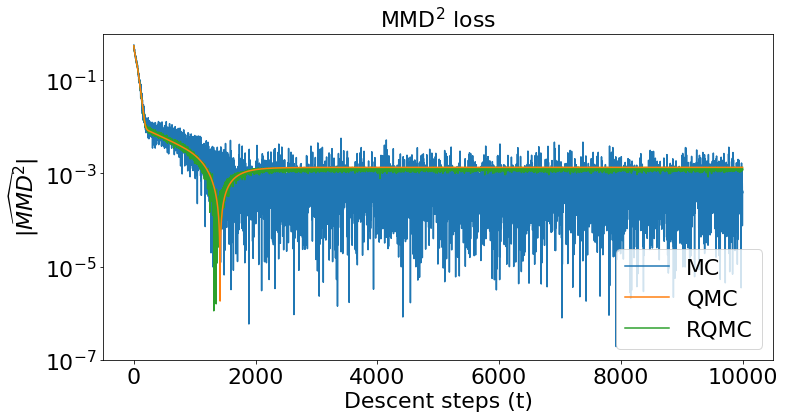

In [ ]:
plot_loss(it,d,(12,6),loss_mc,loss_qmc,loss_rqmc,'MC','QMC','RQMC')

Plot the estimates:

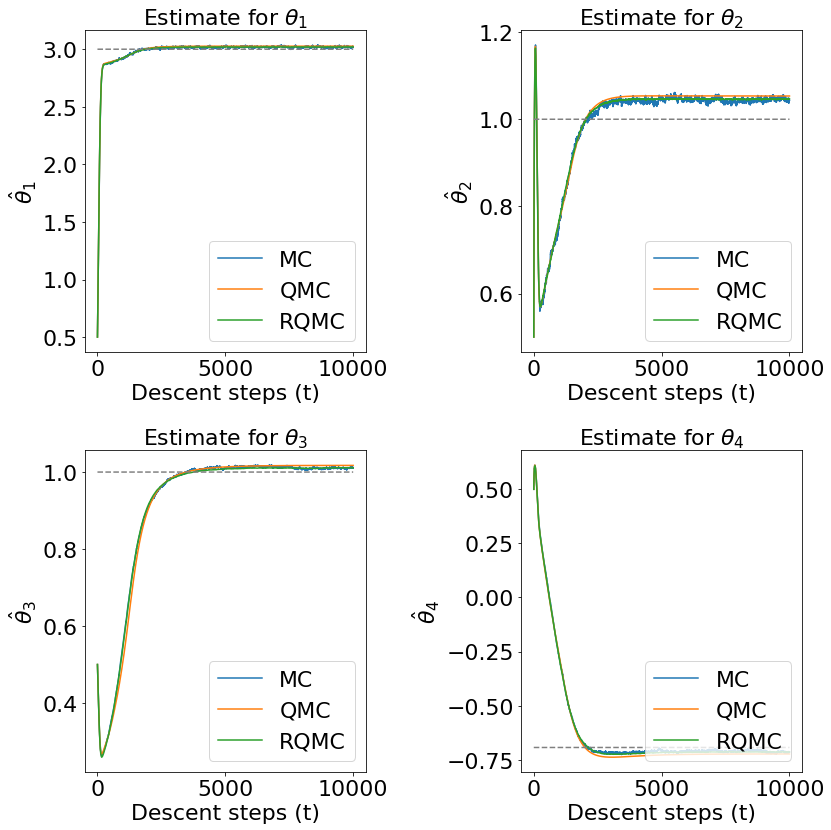

In [ ]:
plot_estimates(2,p,d,(12,((p//2)+(p%2))*6),max_it,theta_mc,theta_qmc,theta_rqmc,theta_star,'MC','QMC','RQMC')

Plot the MSE:

In [ ]:
mse_mc,mse_qmc,mse_rqmc = mse(max_it,p,theta_mc,theta_qmc,theta_rqmc,theta_star)

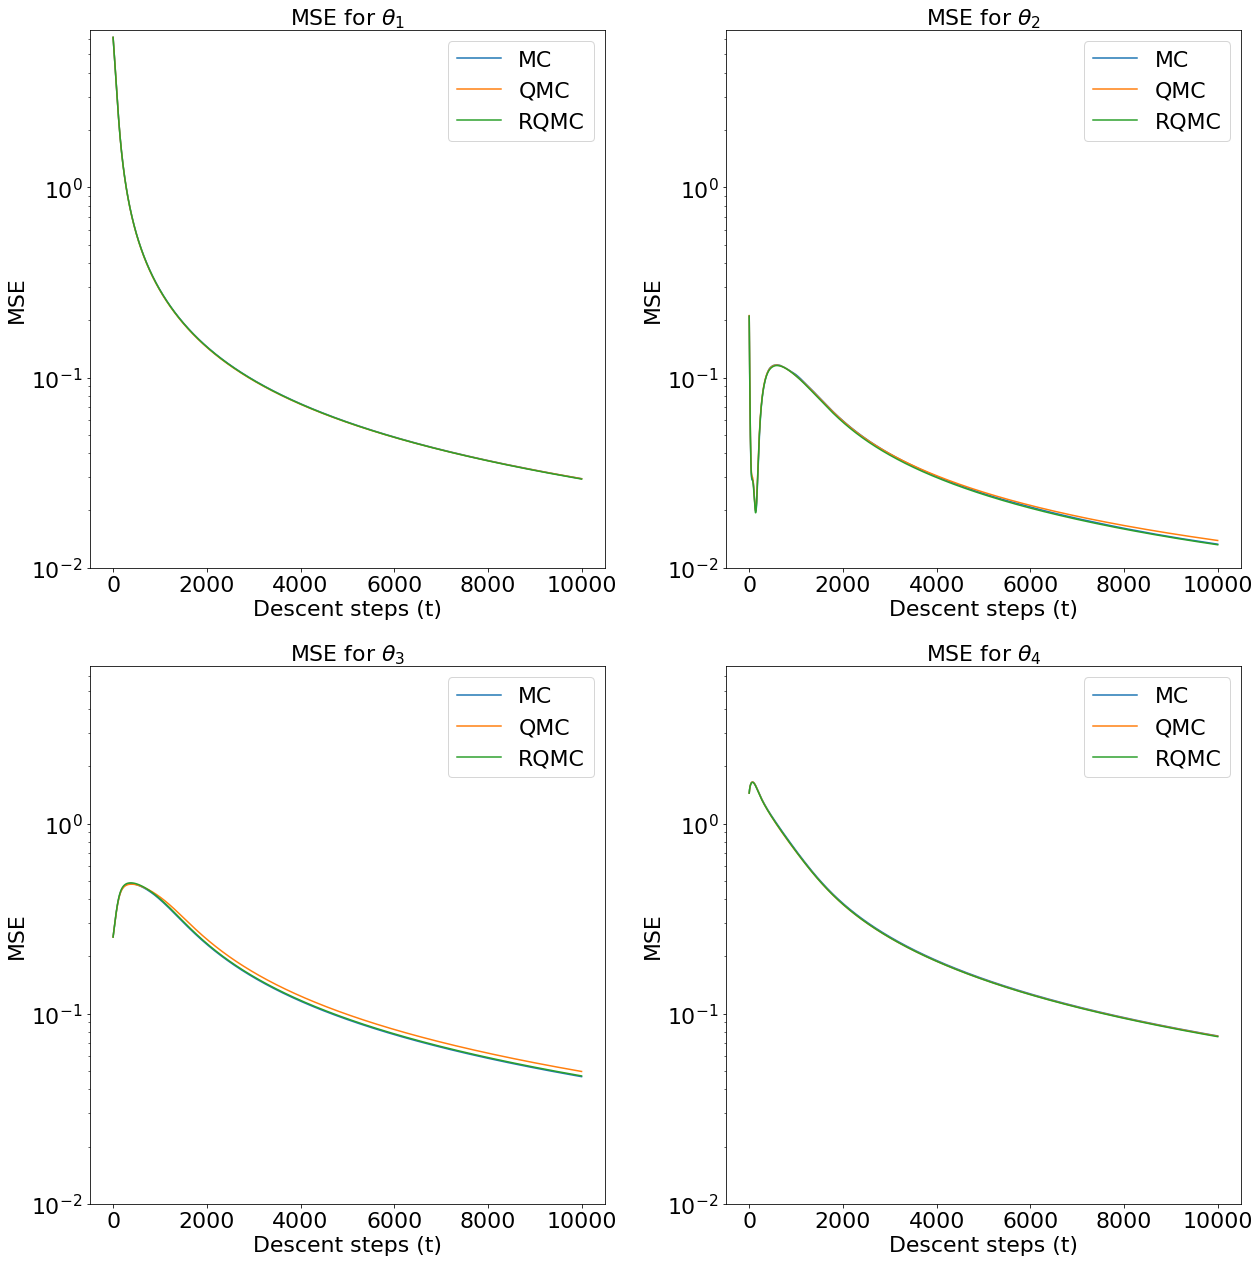

In [ ]:
plot_mse(2,p,d,(18,((p//2)+(p%2))*9),max_it,mse_mc,mse_qmc,mse_rqmc,'MC','QMC','RQMC','gandk')